# 0.) Import the Credit Card Fraud Data From CCLE

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [81]:
df = pd.read_csv("fraudTest.csv")

In [82]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [83]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/tp/zh64fv6d1lx6rq42d6ymqtqw0000gn/T/ipykernel_32384/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/tp/zh64fv6d1lx6rq42d6ymqtqw0000gn/T/ipykernel_32384/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [84]:
df_select.head()

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,25
1,2020-06-21 12:14:33,personal_care,29.84,302,0,33
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,53
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,15
4,2020-06-21 12:15:17,travel,3.19,1126,0,17


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [88]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)
#we will use the holdout set to test the final model

In [89]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [90]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [91]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [39]:
from sklearn.linear_model import LogisticRegression

In [92]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)
#For over sampling, undersampling and SMOTE, we will use logistic regression as the model

# 4.) Test the three models

In [93]:
over_log.score(X_test, y_test)

0.9150171549221431

In [94]:
under_log.score(X_test, y_test)

0.9058398713980662

In [95]:
smote_log.score(X_test, y_test)

0.9105184865279877

In [96]:

# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure? (No, it is not)
#They are really similar, and there is some randomness in the model.

# 5.) Which performed best in Out of Sample metrics?

In [97]:
# Sensitivity here in credit fraud is more important as seen from last class

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
y_true = y_test

In [100]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76041,  7006],
       [   78,   233]])

In [101]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7491961414790996


In [102]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75279,  7768],
       [   81,   230]])

In [103]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7395498392282959


In [104]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75666,  7381],
       [   78,   233]])

In [105]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7491961414790996


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [140]:
raw_temp = pd.concat([pd.DataFrame(X_train), y_train], axis =1)

In [141]:
#Lets add column names to the dataframe
raw_temp.columns = list(X.columns) + ["is_fraud"]

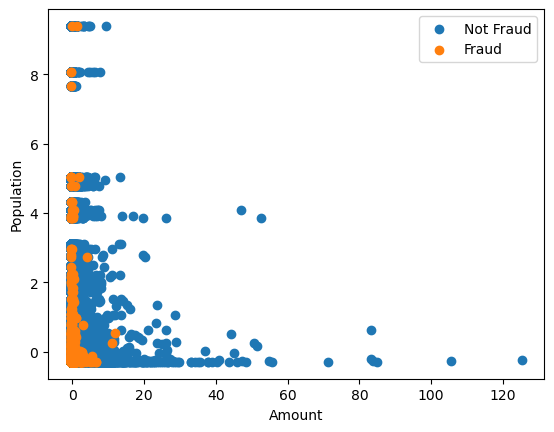

In [142]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Not Fraud",  "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [143]:
#Maybe SMOTE could create new data where there would not make sense. Thats one problem with SMOTE
smote_y

0         0
1         0
2         0
3         0
4         0
         ..
775013    1
775014    1
775015    1
775016    1
775017    1
Name: is_fraud, Length: 775018, dtype: int64

In [144]:

raw_temp = pd.concat([pd.DataFrame(smote_X), smote_y], axis =1)
raw_temp.columns = list(X.columns) + ["is_fraud"]   


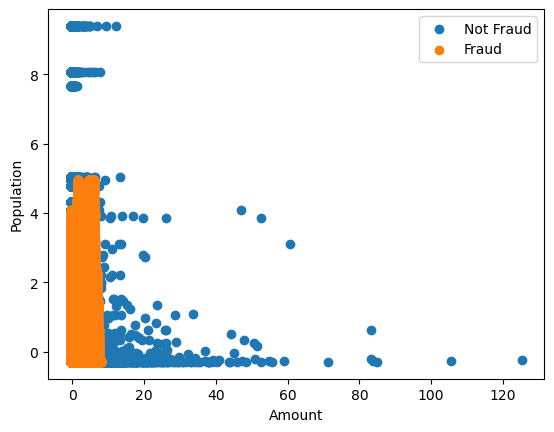

In [145]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [ ]:
#Smoke filled the values within the pictures as opposed to the original data.
#Certain Data points are closer than others.

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [149]:
#We got 9 models so that can be ineficient.
#We can tryh to store our models inside dictionaries 
resampling_methods = {
    "Over Sampling" : RandomOverSampler(),
    "Under Sampling" : RandomUnderSampler(),
    "SMOTE" : SMOTE()
}

model_configs = {  
    "Logistic Regression" : LogisticRegression(),
    "Lasso" : LogisticRegression(penalty = "l1", C = 2,solver = "liblinear"), #Lasso inside logistic regression. C would be the inverse of lambda (0.5 is the same as 2)
    #Solver is the algorithm to use in the optimization problem. Liblinear is good for small datasets
    "Decision Tree" : DecisionTreeClassifier()
}

In [150]:
#Creating a function to calculate the performance metrics.
#The inputs are the true values and the predicted values
def calc_perf_metrics(y_true, y_pred) :
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    #cm[1,1] is the True Positive, cm[1,0] is the False Negative
    #Sensitivity is the True Positive Rate. From all the actual positives, how many did we predict as positive
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    #cm[0,0] is the True Negative, cm[0,1] is the False Positive
    #from all the actual negatives, how many did we predict as negative
    precision = precision_score(y_true, y_pred)
    #cm[0,1] is the False Positive
    #Precision is, From all the predicted positives, how many are actually positive
    recall = recall_score(y_true, y_pred)
    #Recall is the same as Sensitivity. 
    f1 = f1_score(y_true, y_pred)
    return sensitivity, specificity, precision, recall, f1

In [151]:

trained_models = {}
results = []

In [152]:
#We use loops for training multiple models at once
for resample_key, resampler in resampling_methods.items(): #We are going to iterate over the resampling methods
    #resample_key is the name of the resampling method, resampler is the object
    resample_X, resample_y = resampler.fit_resample(X_train, y_train) #With the object resampler we are going to fit and resample the data
    
    for model_name, model in model_configs.items(): #We are going to iterate over the model configurations
        #model_name is the name of the model, model is the object
        combined_key = f"{resample_key}_{model_name}" #We are going to create a combined key: resampler method + model name
        #This is a way to combine strings in Python, using objects that would be evaluated and printed as strings (the objec could also be a function with an output)
        trained_models[combined_key] = model.fit(resample_X, resample_y) #We are going to fit the model with the resampled data
        #We are going to store the trained model inside the trained_models dictionary with the combined key
        #Here we are adding a value (model.fit) to a dictionary (trained_models) with a key (combined_key)
        y_pred = trained_models[combined_key].predict(X_test) #We are going to predict the test data with the trained model
        
        sensitivity, specificity, precision, recall, f1 = calc_perf_metrics(y_test, y_pred) #We are going to calculate the performance metrics
        results.append({"Model" : combined_key,
                        "Sensitivity" : sensitivity,
                        "Specificity" : specificity, 
                        "Precision" : precision,
                        "Recall" : recall, 
                        "F1" : f1})
        

In [153]:
results_df = pd.DataFrame(results)

In [154]:
results_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,Over Sampling_Logistic Regression,0.749196,0.915361,0.032085,0.749196,0.061534
1,Over Sampling_Lasso,0.749196,0.915421,0.032107,0.749196,0.061575
2,Over Sampling_Decision Tree,0.536977,0.998591,0.588028,0.536977,0.561345
3,Under Sampling_Logistic Regression,0.745981,0.886040,0.023927,0.745981,0.046368
4,Under Sampling_Lasso,0.745981,0.885270,0.023770,0.745981,0.046073
5,Under Sampling_Decision Tree,0.954984,0.941648,0.057748,0.954984,0.108911
6,SMOTE_Logistic Regression,0.749196,0.910340,0.030342,0.749196,0.058323
7,SMOTE_Lasso,0.749196,0.910352,0.030346,0.749196,0.058330
8,SMOTE_Decision Tree,0.726688,0.993233,0.286802,0.726688,0.411283


We want to see wich resampling is better for wich model.